# The Dataset

In [1]:
!pip install wordcloud 
!pip install nltk 
!pip install spacy 
!pip install PyPDF2 
!pip install scikit-learn 
!pip install gensim 
!pip install joblib 
!pip install pandas 
!pip install matplotlib 
!pip install seaborn 
!pip install numpy
!pip install fasttext
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
!pip install transformers
!pip install torch torchvision torchaudio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, MWETokenizer
from nltk.stem import WordNetLemmatizer
import PyPDF2
import io
import sys
from spacy.matcher import Matcher
import spacy
from PyPDF2 import PdfReader
import json
from spacy.matcher import Matcher
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
import pickle
import joblib
from sklearn.svm import SVC
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification

     ---------------------------------------- 12.8/12.8 MB 5.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.7.1/en_core_web_md-3.7.1-py3-none-any.whl (42.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


ERROR: Invalid requirement: 'torchvision\xa0torchaudio'


In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

## Exploring Categories

In [5]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

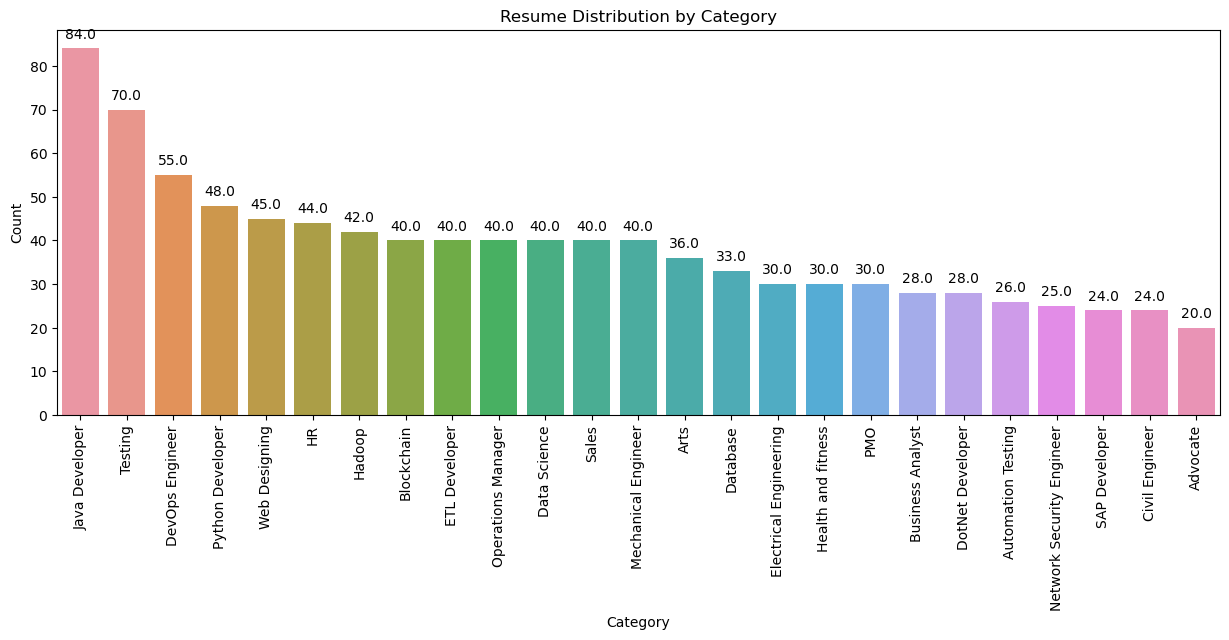

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Set x-axis labels to category names
plt.title('Resume Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

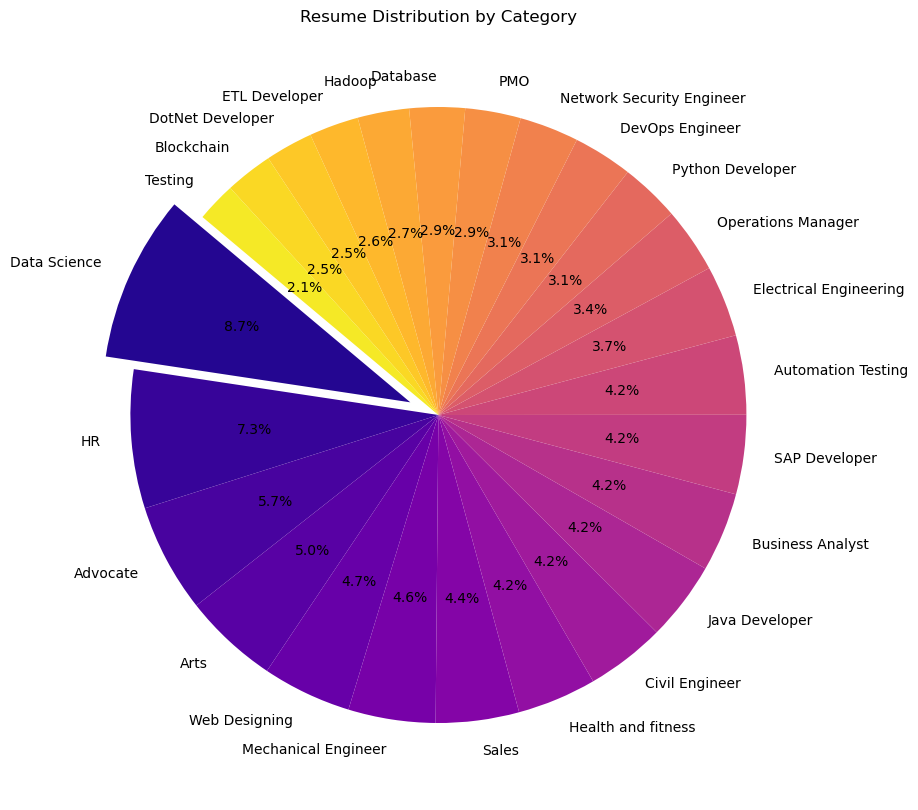

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Category' column is numerical, convert it to strings
df['Category'] = df['Category'].astype(str)

plt.figure(figsize=(15, 10))

# Plot pie chart
colors = sns.color_palette('plasma', len(df['Category'].unique()))

# Adjust the explode parameter based on the number of categories
explode = tuple(0.1 if i == 0 else 0 for i in range(len(df['Category'].unique())))

plt.pie(df['Category'].value_counts(), labels=df['Category'].unique(), autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)

# Add title and legend
plt.title('Resume Distribution by Category')
# plt.legend(df['Category'].unique(), title='Categories', loc='upper right')

plt.show()


# Exploring Resume

In [9]:
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

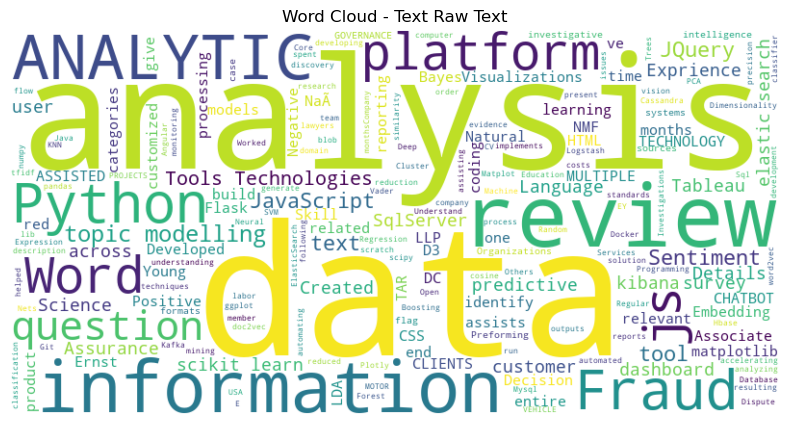

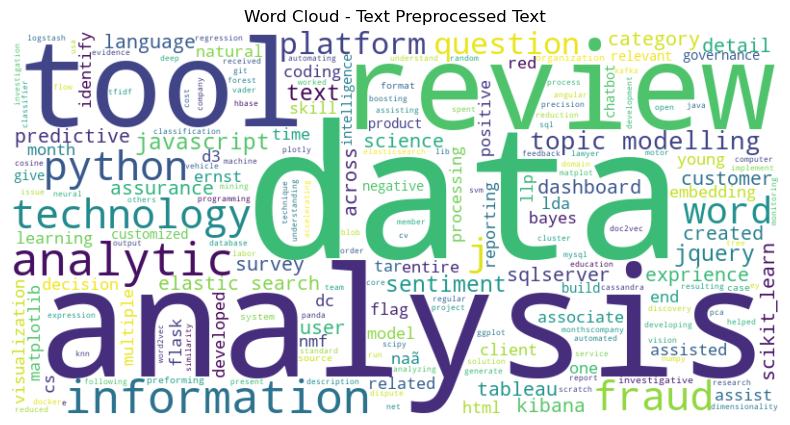

<class 'list'>


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, MWETokenizer
from nltk.stem import WordNetLemmatizer

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

def preprocess_text(text):
    
    loaded_mwe_list = []
    with open('data/mwe_list.txt', 'r') as file:
        for line in file:
            loaded_mwe_list.append(tuple(line.strip().split()))
    # Define multi-word expressions
    mwe_list = loaded_mwe_list
    # Lowercasing
    text = text.lower()

    # Remove special characters
    text = re.sub(r'\W', ' ', text)

    # MWETokenizer
    mwe_tokenizer = MWETokenizer(mwe_list, separator='_')
    
    # First tokenize to single words
    single_word_tokens = word_tokenize(text)

    # Then use MWETokenizer
    tokens = mwe_tokenizer.tokenize(single_word_tokens)

    # Stopwords removal
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(w) for w in tokens]

    return lemmatized_text

def plot_wordcloud(text,title):
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - Text'+title)

    # Show the plot or save it to a file
    plt.show()
    # plt.savefig(f'wordcloud_text_{index+1}.png')

def extract_skills_backup(skills_per_category, processed_text_from_spacy):
    # Load spaCy model
    nlp = spacy.load('en_core_web_sm')
    
    # Convert the processed_text_from_spacy string to a spaCy Doc object
    doc = nlp(processed_text_from_spacy)

    # Extract skills using spaCy Matcher and skills dictionary
    matcher = Matcher(nlp.vocab)

    # Create patterns from skills dictionary
    for category, category_skills in skills_per_category.items():
        for skill in category_skills:
            pattern = [{"LOWER": token.lower()} for token in skill.split()]
            matcher.add(category + "_" + skill.replace(" ", "_"), [pattern])

    matches = matcher(doc)
    matched_skills = []
    seen_skills = set()  # To keep track of unique skills

    for match_id, start, end in matches:
        skill_text = doc[start:end].text.split("_")[1] if "_" in doc[start:end].text else doc[start:end].text
        if skill_text not in seen_skills:
            matched_skills.append(skill_text)
            seen_skills.add(skill_text)
    return matched_skills

resume_text = df['Resume'][0]
plot_wordcloud(resume_text," Raw Text")
processed_text = preprocess_text(resume_text)
preprocessed_teXt_str = ' '.join(processed_text)
plot_wordcloud(preprocessed_teXt_str," Preprocessed Text")


print(type(processed_text))



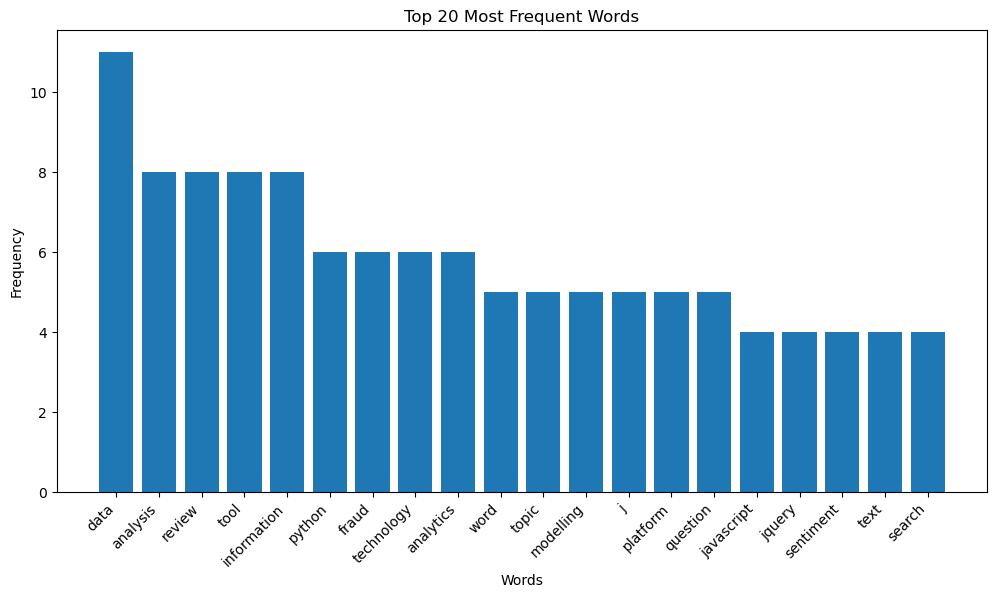

In [12]:
from collections import Counter

# Assuming processed_text is your list of words
word_freq = Counter(processed_text)

# Limit the number of words displayed (top 20)
top_words = dict(word_freq.most_common(20))

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


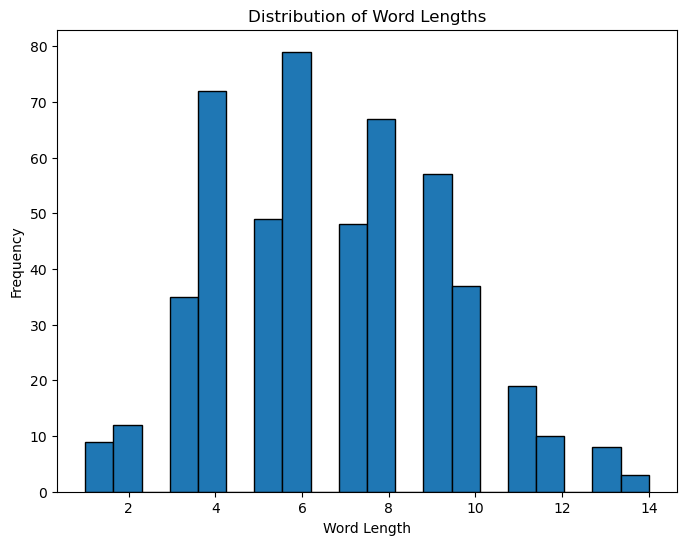

In [13]:
# Get word lengths
word_lengths = [len(word) for word in processed_text]

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(word_lengths, bins=20, edgecolor='black')
plt.title('Distribution of Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()


In [14]:


def extract_skills(text):
    # Example skill set (you would expand this list)
    
    # Load the list from the text file
    loaded_skills = []
    with open('data/predefined_skills.txt', 'r') as file:
        predefined_skills = [line.strip() for line in file]

    # Verify the loaded data
    predefined_skills_lowered = [skill.lower() for skill in predefined_skills]
    # print('Preprecessed lowered: ',predefined_skills_lowered)
    
    skills = []

    for word in text:
        if word in predefined_skills_lowered:
            skills.append(word)

    return list(set(skills))

skills = extract_skills(processed_text)
print("The extracted skills are:", skills)
df

The extracted skills are: ['python', 'angular', 'docker', 'mysql', 'word', 'sql', 'indexing', 'bootstrap', 'flask', 'cassandra', 'javascript', 'tableau', 'html', 'database', 'erp', 'coding', 'java', 'classification', 'git', 'numpy', 'hbase', 'matplotlib', 'programming', 'kafka']


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [15]:

df['processed'] = df['Resume'].apply(preprocess_text)
df['Skills'] = df['processed'].apply(extract_skills)

df['Skills_non_list'] = df['Skills'].apply(lambda x: ' '.join(map(str, x)))

In [16]:
df

,Category,Resume,processed,Skills,Skills_non_list
0,Data Science,Skills * Programming Languages: Python (pandas...,"[skill, programming, language, python, panda, ...","[python, angular, docker, mysql, word, sql, in...",python angular docker mysql word sql indexing ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[education, detail, may, 2013, may, 2017, b, e...","[github, python, classification, aws]",github python classification aws
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[area, interest, deep, learning, control, syst...","[software, matlab, python, labview, flask, sql...",software matlab python labview flask sql djang...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[skill, â, r, â, python, â, sap, hana, â, tabl...","[kpis, python, word, normalization, database, ...",kpis python word normalization database sap et...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[education, detail, mca, ymcaust, faridabad, h...","[python, java, database]",python java database
...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,"[computer, skill, â, proficient, m, office, wo...","[office, creativity, excel, testing, word]",office creativity excel testing word
958,Testing,â Willingness to accept the challenges. â ...,"[â, willingness, accept, challenge, â, positiv...","[testing, electronics]",testing electronics
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","[personal, skill, â, quick, learner, â, eagern...","[testing, leadership]",testing leadership
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,"[computer, skill, software, knowledge, m, powe...","[software, matlab, office, electronics]",software matlab office electronics


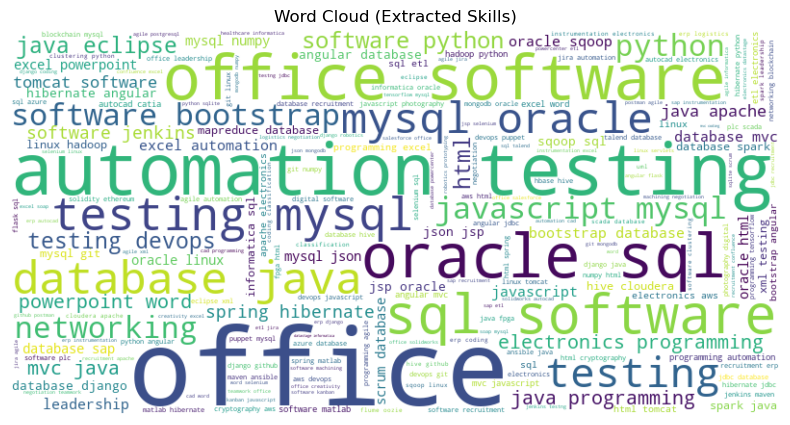

In [17]:
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'text_column' is the name of the column containing text in your DataFrame
text_column = df['Skills_non_list']

# Create a WordCloud object with custom settings
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', stopwords=STOPWORDS).generate(' '.join(text_column))

# Generate word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Extracted Skills)')

# Optionally, save the word cloud to an image file
# wordcloud.to_file("wordcloud.png")

plt.show()


# Loading and cleaning test resume

In [18]:
import PyPDF2
import re
import io
import sys
import spacy
from PyPDF2 import PdfReader


def clean_and_extract_text(pdf_path):
    with open(pdf_path, 'rb') as f:
        pdf_reader = PdfReader(f)
        num_pages = len(pdf_reader.pages)
        text = ""
        
        for page in range(num_pages):
            pdf_page = pdf_reader.pages[page]
            text += pdf_page.extract_text()
            
    # Remove all non-alphanumeric characters except space and new line
    text = re.sub(r'[^a-zA-Z0-9\s\n]+', '', text)
    cleaned_text = text.replace('\n', ' ')
    
    # Extract Name
    # Now let's use spaCy to extract the names
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(cleaned_text)
    
    return cleaned_text


In [19]:
cleaned_resume = clean_and_extract_text(r"TESTING/Jane Doe - Data Scientist.pdf")

print(cleaned_resume)
preprocessed_test = preprocess_text(cleaned_resume)
skills_test = extract_skills(preprocessed_test)
preprocessed_test_str = ' '.join(preprocessed_test)
skills_test_str = ' '.join(skills_test)

Jane Doe  555 5555555  janedoeemailcom  123 Main Street Anytown CA 12345     Summary     Highly motivated and experienced data scientist with a proven track record of success in developing  and implementing data driven solutions for a variety of businesses Expertise in machine learning  statistical analysis and data visualization Passionate about using data to drive business insights and  improve decision making     Skills     Programming Languages Python R Java SQL   Machine Learning Algorithms Linear regression logistic regression random forests support vector  machines   Statistical Methods Hypothesis testing regression analysis ANOVA   Data Visualization Tools Tableau Power BI Matplotlib Seaborn   Experience     Data Scientist  Google  Mountain View CA  2020  Present     Developed and implemented machine learning models to predict user behavior and improve product  engagement   Performed data analysis to identify trends and patterns in user data   Created data visualizations to com

In [20]:
import json
# Load from the text file
with open('data/skills_per_category_dict.txt', 'r') as file:
    skills_per_category = json.load(file)

def extract_skills_backup(skills_per_category, processed_text_from_spacy):
    # Load spaCy model
    nlp = spacy.load('en_core_web_sm')
    
    # Convert the processed_text_from_spacy string to a spaCy Doc object
    doc = nlp(processed_text_from_spacy)

    # Extract skills using spaCy Matcher and skills dictionary
    matcher = Matcher(nlp.vocab)

    # Create patterns from skills dictionary
    for category, category_skills in skills_per_category.items():
        for skill in category_skills:
            pattern = [{"LOWER": token.lower()} for token in skill.split()]
            matcher.add(category + "_" + skill.replace(" ", "_"), [pattern])

    matches = matcher(doc)
    matched_skills = []
    seen_skills = set()  # To keep track of unique skills

    for match_id, start, end in matches:
        skill_text = doc[start:end].text.split("_")[1] if "_" in doc[start:end].text else doc[start:end].text
        if skill_text not in seen_skills:
            matched_skills.append(skill_text)
            seen_skills.add(skill_text)
    return matched_skills

skills_test = extract_skills_backup(skills_per_category,cleaned_resume)

skills_test = ' '.join(skills_test)
skills_test

'machine learning statistical analysis data visualization Python R Java SQL Machine Learning regression analysis Data Visualization Tableau Power BI Matplotlib data analysis Data Science'

# BERT Training and Predictions

In [21]:
# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

## Pretrained BERT

In [22]:


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(category_mapping))

encoded_resume = tokenizer.encode_plus(
    cleaned_resume,
    max_length=512,  # Adjust as needed based on the model's maximum input length
    padding='max_length',
    truncation=True,
    return_tensors='pt'  # Return PyTorch tensors
)

import torch
model.eval()
with torch.no_grad():
    logits = model(**encoded_resume).logits

prediction_id = torch.argmax(logits).item()
prediction_id

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print("Prediction ID:", prediction_id)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Category: Sales
Prediction ID: 22


### BERT Fine-tuning

In [23]:
# df = pd.read_csv('UpdatedResumeDataSet.csv')


In [24]:
# # import torch
# # from torch.utils.data import Dataset, DataLoader
# # from transformers import BertTokenizer, BertForSequenceClassification, AdamW
# # from torch.utils.tensorboard import SummaryWriter
# # from sklearn.model_selection import train_test_split
# # from sklearn.preprocessing import LabelEncoder
# # import pandas as pd
# # import matplotlib.pyplot as plt


# # Tokenizer setup
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# def tokenize_resume(resume_text):
#     return tokenizer.encode_plus(
#         resume_text,
#         max_length=512,
#         padding='max_length',
#         truncation=True,
#         return_tensors='pt'
#     )

# # Label encoding
# label_encoder = LabelEncoder()
# df['Category'] = label_encoder.fit_transform(df['Category'])

# class CustomDataset(Dataset):
#     def __init__(self, texts, labels):
#         self.texts = texts
#         self.labels = labels

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         encoding = tokenize_resume(self.texts[idx])
#         item = {
#             'input_ids': encoding['input_ids'].squeeze(),
#             'attention_mask': encoding['attention_mask'].squeeze(),
#             'labels': torch.tensor(self.labels[idx], dtype=torch.long)
#         }
#         return item

# # Train-test split
# df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

# # Datasets and DataLoaders
# train_dataset = CustomDataset(df_train['Resume'].values, df_train['Category'].values)
# val_dataset = CustomDataset(df_val['Resume'].values, df_val['Category'].values)

# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# # Model setup
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
# model.to(device)

# # Load the pre-trained model and optimizer state if available
# # You need to save these during the training loop (model.save_pretrained and optimizer.save_state_dict)
# # model.load_pretrained('fine_tuned_model')  # Example filename, modify as needed
# # optimizer.load_state_dict(torch.load('optimizer_state.pth'))  # Example filename, modify as needed

# optimizer = AdamW(model.parameters(), lr=5e-5)

# # Training loop without early stopping for simplicity
# num_epochs = 3  # Adjust the number of epochs as needed

# for epoch in range(num_epochs):
#     model.train()
#     total_loss = 0

#     for batch_idx, batch in enumerate(train_loader):
#         optimizer.zero_grad()
#         inputs = {key: batch[key].to(device) for key in batch if key != 'labels'}
#         labels = batch['labels'].to(device)
#         outputs = model(**inputs, labels=labels)
#         loss = outputs.loss
#         total_loss += loss.item()
#         loss.backward()
#         optimizer.step()

#     average_loss = total_loss / len(train_loader)
#     print(f'Epoch {epoch + 1}/{num_epochs} - Training Loss: {average_loss}')

# # Evaluation for classification report
# model.eval()
# all_preds = []
# all_labels = []

# with torch.no_grad():
#     for val_batch in val_loader:
#         val_inputs = {key: val_batch[key].to(device) for key in val_batch if key != 'labels'}
#         val_labels = val_batch['labels'].to(device)
#         val_outputs = model(**val_inputs, labels=val_labels)
#         preds = torch.argmax(val_outputs.logits, dim=1)
#         all_preds.extend(preds.cpu().numpy())
#         all_labels.extend(val_labels.cpu().numpy())

# # Convert back to original labels using label_encoder.inverse_transform
# predicted_labels = label_encoder.inverse_transform(all_preds)
# true_labels = label_encoder.inverse_transform(all_labels)

# # Print the classification report
# print(classification_report(true_labels, predicted_labels))

# # # Save the fine-tuned model
# # model.save_pretrained('fine_tuned_model')

# # # Close the TensorBoard writer
# # writer.close()

# # # Plot loss curves
# # plt.plot(train_losses, label='Training Loss')
# # plt.plot(val_losses, label='Validation Loss')
# # plt.xlabel('Epoch')
# # plt.ylabel('Loss')
# # plt.legend()
# # plt.show()


#### Bert fine-tuned on full resume text

In [25]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the fine-tuned BERT model
model = BertForSequenceClassification.from_pretrained('data/fine_tuned_model', num_labels=len(category_mapping))

# Load the original BERT tokenizer associated with the model you fine-tuned from
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')



import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the fine-tuned BERT model
model = BertForSequenceClassification.from_pretrained('data/fine_tuned_model', num_labels=len(category_mapping))

# Load the original BERT tokenizer associated with the model you fine-tuned from
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the cleaned resume
encoded_resume = tokenizer.encode_plus(
    cleaned_resume,
    max_length=512,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Make the prediction using the fine-tuned BERT model
model.eval()
with torch.no_grad():
    logits = model(**encoded_resume).logits

# Get the top-k predictions and their probabilities
top_k_predictions = torch.topk(logits, k=3, dim=1)

# Extract the IDs and probabilities of the top-k predictions
top_k_prediction_ids = top_k_predictions.indices.squeeze().tolist()
top_k_probabilities = torch.nn.functional.softmax(top_k_predictions.values, dim=1).squeeze().tolist()

# Map category IDs to category names
top_k_category_names = [category_mapping.get(prediction_id, "Unknown") for prediction_id in top_k_prediction_ids]

# Print the top-k predictions and their probabilities
for i, (category_name, prediction_id, probability) in enumerate(zip(top_k_category_names, top_k_prediction_ids, top_k_probabilities), 1):
    print(f"Top-{i} Prediction:")
    print("Category Name:", category_name)
    print("Prediction ID:", prediction_id)
    print("Probability:", probability)
    print()



Top-1 Prediction:
Category Name: Data Science
Prediction ID: 6
Probability: 0.998868465423584

Top-2 Prediction:
Category Name: Python Developer
Prediction ID: 20
Probability: 0.0006057353457435966

Top-3 Prediction:
Category Name: Hadoop
Prediction ID: 13
Probability: 0.0005258170422166586



### Bert Training on extracted skills (Commented code as training completed and fine-tuned model saved locally)

In [26]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW
# from torch.utils.tensorboard import SummaryWriter
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd
# import matplotlib.pyplot as plt


# # Tokenizer setup
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# def tokenize_resume(preprocessed_test_str):
#     return tokenizer.encode_plus(
#         preprocessed_test_str,
#         max_length=512,
#         padding='max_length',
#         truncation=True,
#         return_tensors='pt'
#     )

# # Label encoding
# label_encoder = LabelEncoder()
# df['Category'] = label_encoder.fit_transform(df['Category'])

# class CustomDataset(Dataset):
#     def __init__(self, texts, labels):
#         self.texts = texts
#         self.labels = labels

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         encoding = tokenize_resume(self.texts[idx])
#         item = {
#             'input_ids': encoding['input_ids'].squeeze(),
#             'attention_mask': encoding['attention_mask'].squeeze(),
#             'labels': torch.tensor(self.labels[idx], dtype=torch.long)
#         }
#         return item

# # Train-test split
# df_train, df_val = train_test_split(df, test_size=0.2, random_state=42,stratify = y)

# # Datasets and DataLoaders
# train_dataset = CustomDataset(df_train['Skills_non_list'].values, df_train['Category'].values)
# val_dataset = CustomDataset(df_val['Skills_non_list'].values, df_val['Category'].values)

# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# # Model setup
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
# model.to(device)
# optimizer = AdamW(model.parameters(), lr=5e-5)

# # TensorBoard setup
# writer = SummaryWriter()

# # Training loop with early stopping
# num_epochs = 10  # Increase the number of epochs as needed
# patience = 3  # Adjust the patience parameter

# best_val_loss = float('inf')
# no_improvement_count = 0
# train_losses = []
# val_losses = []

# for epoch in range(num_epochs):
#     model.train()
#     total_loss = 0

#     for batch_idx, batch in enumerate(train_loader):
#         optimizer.zero_grad()
#         inputs = {key: batch[key].to(device) for key in batch if key != 'labels'}
#         labels = batch['labels'].to(device)
#         outputs = model(**inputs, labels=labels)
#         loss = outputs.loss
#         total_loss += loss.item()
#         loss.backward()
#         optimizer.step()

#         # Log training loss to TensorBoard
#         global_step = epoch * len(train_loader) + batch_idx
#         writer.add_scalar('Loss/train', loss.item(), global_step)

#     average_loss = total_loss / len(train_loader)
#     train_losses.append(average_loss)
#     print(f'Epoch {epoch + 1}/{num_epochs} - Training Loss: {average_loss}')

#     # Validation
#     model.eval()
#     val_loss = 0

#     with torch.no_grad():
#         for val_batch in val_loader:
#             val_inputs = {key: val_batch[key].to(device) for key in val_batch if key != 'labels'}
#             val_labels = val_batch['labels'].to(device)
#             val_outputs = model(**val_inputs, labels=val_labels)
#             val_loss += val_outputs.loss.item()

#     average_val_loss = val_loss / len(val_loader)
#     val_losses.append(average_val_loss)
#     print(f'Epoch {epoch + 1}/{num_epochs} - Validation Loss: {average_val_loss}')

#     # Check for early stopping
#     if average_val_loss < best_val_loss:
#         best_val_loss = average_val_loss
#         no_improvement_count = 0
#     else:
#         no_improvement_count += 1

#     if no_improvement_count >= patience:
#         print(f'Early stopping at epoch {epoch + 1}')
#         break

# # Save the fine-tuned model
# model.save_pretrained('fine_tuned_model_with_resume')

# # Close the TensorBoard writer
# writer.close()

# # Plot loss curves
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [27]:
# 

In [28]:

import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the fine-tuned BERT model
model = BertForSequenceClassification.from_pretrained('data/fine_tuned_model_with_skills', num_labels=len(category_mapping))

# Load the original BERT tokenizer associated with the model you fine-tuned from
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Tokenize and encode the cleaned resume
encoded_resume = tokenizer.encode_plus(
    skills_test,
    max_length=512,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Make the prediction using the fine-tuned BERT model
model.eval()
with torch.no_grad():
    logits = model(**encoded_resume).logits

# Get the top-k predictions and their probabilities
top_k_predictions = torch.topk(logits, k=3, dim=1)

# Extract the IDs and probabilities of the top-k predictions
top_k_prediction_ids = top_k_predictions.indices.squeeze().tolist()
top_k_probabilities = torch.nn.functional.softmax(top_k_predictions.values, dim=1).squeeze().tolist()

# Map category IDs to category names
top_k_category_names = [category_mapping.get(prediction_id, "Unknown") for prediction_id in top_k_prediction_ids]

# Print the top-k predictions and their probabilities
for i, (category_name, prediction_id, probability) in enumerate(zip(top_k_category_names, top_k_prediction_ids, top_k_probabilities), 1):
    print(f"Top-{i} Prediction:")
    print("Category Name:", category_name)
    print("Prediction ID:", prediction_id)
    print("Probability:", probability)
    print()

# Tokenize and encode the cleaned resume
encoded_resume = tokenizer.encode_plus(
    skills_test,
    max_length=512,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Make the prediction using the fine-tuned BERT model
model.eval()
with torch.no_grad():
    logits = model(**encoded_resume).logits

prediction_id = torch.argmax(logits).item()

# Map category ID to category name
category_name = category_mapping.get(prediction_id, "Unknown")

# Print the predicted category and its ID
print("Predicted Category:", category_name)
print("Prediction ID:", prediction_id)

Top-1 Prediction:
Category Name: Data Science
Prediction ID: 6
Probability: 0.9840396046638489

Top-2 Prediction:
Category Name: Database
Prediction ID: 7
Probability: 0.009188655763864517

Top-3 Prediction:
Category Name: Automation Testing
Prediction ID: 2
Probability: 0.0067717949859797955

Predicted Category: Data Science
Prediction ID: 6


# NER

In [29]:
import spacy



def extract_names(text):
    # Load spaCy medium-sized model for NER
    nlp = spacy.load("en_core_web_md")
    
    # Process the text using spaCy
    doc = nlp(text)

    # Extract names using spaCy Matcher
    matcher = Matcher(nlp.vocab)
    name_pattern = [{"POS": "PROPN"}, {"POS": "PROPN"}]
    matcher.add("Name", [name_pattern])

    matches = matcher(doc)
    names = [doc[start:end].text for match_id, start, end in matches]
    return names[0]

# Example usage:

result = extract_names(cleaned_resume)

print("Extracted Names:", result)




Extracted Names: Jane Doe


In [30]:
# Load from the text file
with open('data/skills_per_category_dict.txt', 'r') as file:
    skills_per_category = json.load(file)
    

# Score Generator

### Job Description

In [31]:
# dob_description_from_employers = input("Please enter the job description to which you want to compare the applicant's profile")
job_description_from_employers = 'data/job_description_1.txt'


# Load data using np.genfromtxt with dtype=None
job_description_from_employers = np.genfromtxt(job_description_from_employers, dtype=None, delimiter='\n', encoding='utf-8')

# Convert the loaded data to a single string
job_description_from_employers = '\n'.join(job_description_from_employers)
job_description_from_employers = preprocess_text(job_description_from_employers)
job_description_from_employers = " ".join(job_description_from_employers)
print(type(job_description_from_employers))


<class 'str'>


### Function to get the similiarty between Resume and Job description with the help of cosine similiarity

In [32]:
import os
import glob
from  PyPDF2 import PdfReader
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import itertools
from collections import defaultdict


def load_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        text = ""
        for page_number in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page_number].extract_text()
    return text

def calculate_cosine_similarity_bert(resume, job_description, tokenizer, model):
    # Preprocess text
    preprocessed_resume = preprocess_text(resume)
    preprocessed_job_description = preprocess_text(job_description)

    # Tokenize and encode the texts using BERT
    encoded_resume = tokenizer.encode_plus(
        ' '.join(preprocessed_resume),
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    encoded_job_description = tokenizer.encode_plus(
        ' '.join(preprocessed_job_description),
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    # Get BERT embeddings
    with torch.no_grad():
        resume_embedding = model(**encoded_resume).last_hidden_state.mean(dim=1).numpy().reshape(1, -1)
        job_description_embedding = model(**encoded_job_description).last_hidden_state.mean(dim=1).numpy().reshape(1, -1)

    # Calculate cosine similarity
    similarity_score = cosine_similarity(resume_embedding, job_description_embedding)[0, 0]

    return similarity_score

# Assuming you have already loaded the fine-tuned BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', max_length=512)
model = BertModel.from_pretrained('data/fine_tuned_model')

# Specify the directory containing PDF files
pdf_directory = r"TESTING"

# Load text from all PDF files in the directory
pdf_files = glob.glob(os.path.join(pdf_directory, '*.pdf'))
resumes = [load_text_from_pdf(pdf_file) for pdf_file in pdf_files]

# Calculate cosine similarity for each resume with the job description
similarity_scores = [calculate_cosine_similarity_bert(resume, job_description_from_employers, tokenizer, model) for resume in resumes]

# Check if similarity_scores is not empty
if similarity_scores:
    # Print the similarity scores
    for i, score in enumerate(similarity_scores):
        print(f"Cosine Similarity for Resume {i + 1}: {score}")

    # Create an index and assign points based on similarity scores
    resume_index = defaultdict(int)
    for i, score in enumerate(similarity_scores):
        resume_index[f"Resume {i + 1}"] = int(score * 100)  # Multiply by 100 to get points

    # Print the index with points
    print("\nResume Index with Points:")
    for resume, points in resume_index.items():
        print(f"{resume}: {points} points")

    # Compare similarity scores and select the person with the highest similarity
    max_similarity_index = max(range(len(resumes)), key=lambda x: similarity_scores[x])
    selected_name = extract_names(resumes[max_similarity_index])
    print(f"\n{selected_name} is most fit for the position with {resume_index[selected_name]} points.")
else:
    print("No similarity scores calculated.")

Cosine Similarity for Resume 1: 0.9703578948974609
Cosine Similarity for Resume 2: 0.9623540639877319
Cosine Similarity for Resume 3: 0.08122033625841141
Cosine Similarity for Resume 4: 0.9846464395523071
Cosine Similarity for Resume 5: 0.9794408082962036
Cosine Similarity for Resume 6: 0.9795865416526794

Resume Index with Points:
Resume 1: 97 points
Resume 2: 96 points
Resume 3: 8 points
Resume 4: 98 points
Resume 5: 97 points
Resume 6: 97 points

Jane Doe is most fit for the position with 0 points.


### Checking the missing skills

In [33]:
def extract_skills_backup(skills_per_category, processed_text_from_spacy):
    # Load spaCy model
    nlp = spacy.load('en_core_web_md')
    
    # Convert the processed_text_from_spacy string to a spaCy Doc object
    doc = nlp(processed_text_from_spacy)

    # Extract skills using spaCy Matcher and skills dictionary
    matcher = Matcher(nlp.vocab)

    # Create patterns from skills dictionary
    for category, category_skills in skills_per_category.items():
        for skill in category_skills:
            pattern = [{"LOWER": token.lower()} for token in skill.split()]
            matcher.add(category + "_" + skill.replace(" ", "_"), [pattern])

    matches = matcher(doc)
    matched_skills = []
    seen_skills = set()  # To keep track of unique skills

    for match_id, start, end in matches:
        skill_text = doc[start:end].text.split("_")[1] if "_" in doc[start:end].text else doc[start:end].text
        if skill_text not in seen_skills:
            matched_skills.append(skill_text)
            seen_skills.add(skill_text)
    return matched_skills

matched_skills_resume = extract_skills_backup(skills_per_category, cleaned_resume)
matched_skills_jd = extract_skills_backup(skills_per_category, job_description_from_employers)



print("Skills from the resume:", matched_skills_resume)
print("Skills from the JD:", matched_skills_jd)


Skills from the resume: ['machine learning', 'statistical analysis', 'data visualization', 'Python', 'R', 'Java', 'SQL', 'Machine Learning', 'regression analysis', 'Data Visualization', 'Tableau', 'Power BI', 'Matplotlib', 'data analysis', 'Data Science']
Skills from the JD: ['machine learning', 'data visualization', 'data science', 'python', 'r', 'tableau', 'power bi', 'tensorflow', 'problem solving', 'pytorch', 'natural language processing', 'aws', 'azure']


In [34]:
def compare_skills(resume_skills, jd_skills):
    # Convert skills to lowercase for case-insensitive comparison
    resume_skills_lower = set(skill.lower() for skill in resume_skills)
    jd_skills_lower = set(skill.lower() for skill in jd_skills)

    # Find extra and missing skills
    extra_skills = list(set(resume_skills_lower) - set(jd_skills_lower))
    missing_skills = list(set(jd_skills_lower) - set(resume_skills_lower))
    
    # Calculate the number of matching skills
    matching_skills_count = len(resume_skills_lower.intersection(jd_skills_lower))

    # Calculate the total number of unique skills in the JD
    total_jd_skills = len(jd_skills_lower)

    # Calculate the percentage of matching skills
    score = (matching_skills_count / total_jd_skills) * 100

    return extra_skills, missing_skills, score

extra_skills, missing_skills, resume_score_on_skills = compare_skills(matched_skills_resume, matched_skills_jd)

print("Extra Skills in Resume:", extra_skills)
print("Missing Skills in Resume:", missing_skills)
print(f"Resume Score based on comparison: {resume_score_on_skills:.2f}%")
resume_score_on_skills



Extra Skills in Resume: ['statistical analysis', 'matplotlib', 'java', 'regression analysis', 'sql', 'data analysis']
Missing Skills in Resume: ['azure', 'problem solving', 'natural language processing', 'pytorch', 'aws', 'tensorflow']
Resume Score based on comparison: 53.85%


53.84615384615385

## Sentiment Analysis

In [35]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer



def analyze_sentiment(resume_text):
    # Initialize the VADER sentiment analyzer
    sid = SentimentIntensityAnalyzer()

    # Get the sentiment scores for the entire resume text
    sentiment_scores = sid.polarity_scores(resume_text)

    # Determine the overall sentiment
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment, sentiment_scores


sentiment, sentiment_scores = analyze_sentiment(resume_text)

print(f"Sentiment: {sentiment}")
print("Sentiment Scores:", sentiment_scores)

Sentiment: Positive
Sentiment Scores: {'neg': 0.048, 'neu': 0.869, 'pos': 0.083, 'compound': 0.9529}


In [36]:
def analyze_resume_length(resume_text):
    # Calculate the number of words in the resume
    word_count = len(resume_text.split())

    # Set the optimal word count range based organizational guidelines
    optimal_range_start = 150
    optimal_range_end = 400

    # Provide recommendations based on the word count
    if word_count < optimal_range_start:
        recommendation = "Add more details to provide a comprehensive overview of your skills and experiences."
    elif word_count > optimal_range_end:
        recommendation = "Consider reducing unnecessary details to keep the resume concise and focused."
    else:
        recommendation = "Your resume length is within an optimal range."

    # Define a scoring system 
    score = 100 - abs(word_count - optimal_range_start)

    return word_count, recommendation, score


word_count, length_recommendation, resume_score = analyze_resume_length(resume_text)

print(f"Word Count: {word_count}")
print(f"Recommendation: {length_recommendation}")
print(f"Resume Score: {resume_score}")


Word Count: 670
Recommendation: Consider reducing unnecessary details to keep the resume concise and focused.
Resume Score: -420


In [37]:
import re
import spacy
import datetime

def extract_years(text):
    # Get the current year
    current_year = datetime.datetime.now().year

    # Pattern to match years (four digits) or 'Present'
    pattern = r'\b(?:\d{4}|Present|present)\b'
    years = re.findall(pattern, text)

    # Keywords indicating the start of the education section
    education_keywords = ['Education', 'Educational', 'School', 'University', 'College', 'education', 'educational', 'school', 'university', 'college']

    # Check if the year is not 'Present' and not in the education section
    in_education_section = False
    filtered_years = []

    for word in re.split(r'\s+', text):
        if any(keyword in word for keyword in education_keywords):
            in_education_section = True
        elif in_education_section and any(re.match(r'\b\d{4}\b', year) for year in [word]):
            continue  # Skip years in the education section
        elif word.lower() == 'education':
            in_education_section = False
        elif word.lower() == 'present':
            filtered_years.append(current_year)
        elif re.match(r'\b\d{4}\b', word):
            filtered_years.append(int(word))

    return filtered_years

def calculate_total_experience(years):
    # Sort the years in ascending order
    years.sort()

    # Calculate the total experience
    total_experience = years[-1] - years[0] if years else 0

    return total_experience

years = extract_years(cleaned_resume)
print("Extracted years:", years)

total_experience = calculate_total_experience(years)
print("Total experience:", total_experience)


Extracted years: [2020, 2024, 2018, 2020]
Total experience: 6


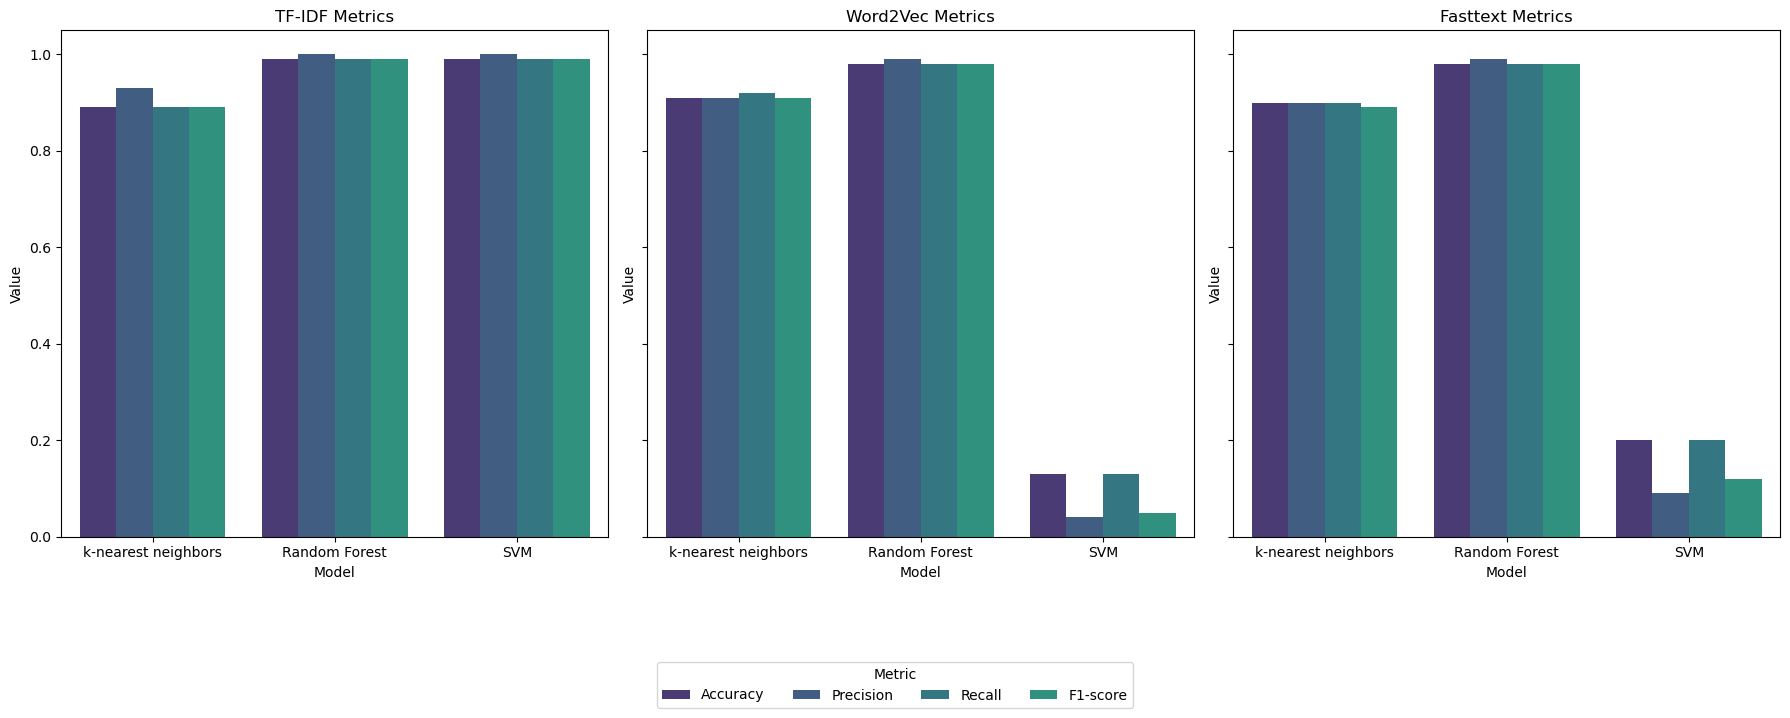

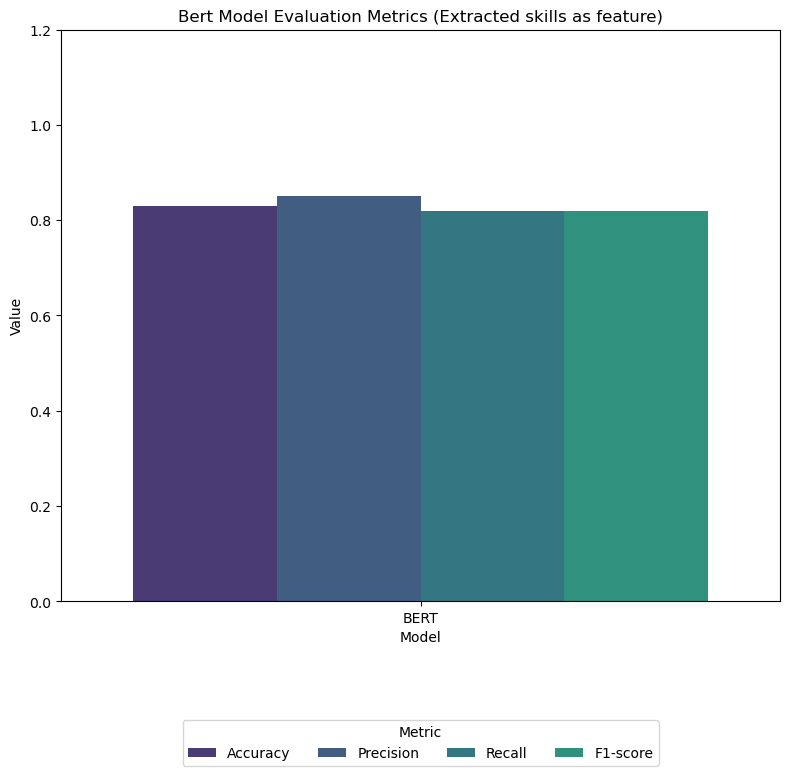

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the color palette
sns.set_palette("husl")

# Non-BERT model data
non_bert_data = {
    'Model': ['k-nearest neighbors', 'Random Forest', 'SVM'],
    'TF-IDF_Accuracy': [0.89, 0.99, 0.99],
    'TF-IDF_Precision': [0.93, 1.00, 1.00],
    'TF-IDF_Recall': [0.89, 0.99, 0.99],
    'TF-IDF_F1-score': [0.89, 0.99, 0.99],
    'Word2Vec_Accuracy': [0.91, 0.98, 0.13],
    'Word2Vec_Precision': [0.91, 0.99, 0.04],
    'Word2Vec_Recall': [0.92, 0.98, 0.13],
    'Word2Vec_F1-score': [0.91, 0.98, 0.05],
    'Fasttext_Accuracy': [0.90, 0.98, 0.20],
    'Fasttext_Precision': [0.90, 0.99, 0.09],
    'Fasttext_Recall': [0.90, 0.98, 0.20],
    'Fasttext_F1-score': [0.89, 0.98, 0.12],
}

def plotgen_non_bert(data, title,pallette):
    
    # Set the color palette
    sns.set_palette(pallette)
    # Convert dictionary to DataFrame
    df_non_bert = pd.DataFrame(data)

    # Melt the DataFrame
    melted_non_bert = df_non_bert.melt(id_vars='Model', var_name='Metric', value_name='Value')

    # Split the melted DataFrame based on vectorization technique
    tfidf_data = melted_non_bert[melted_non_bert['Metric'].str.contains('TF-IDF')]
    word2vec_data = melted_non_bert[melted_non_bert['Metric'].str.contains('Word2Vec')]
    fasttext_data = melted_non_bert[melted_non_bert['Metric'].str.contains('Fasttext')]

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Plot TF-IDF data
    sns.barplot(data=tfidf_data, x='Model', y='Value', hue='Metric', ax=axes[0])
    axes[0].set_title('TF-IDF Metrics')
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('Value')
    axes[0].legend().remove()  # Remove legend from this subplot

    # Plot Word2Vec data
    sns.barplot(data=word2vec_data, x='Model', y='Value', hue='Metric', ax=axes[1])
    axes[1].set_title('Word2Vec Metrics')
    axes[1].set_xlabel('Model')
    axes[1].legend().remove()  # Remove legend from this subplot

    # Plot Fasttext data
    sns.barplot(data=fasttext_data, x='Model', y='Value', hue='Metric', ax=axes[2])
    axes[2].set_title('Fasttext Metrics')
    axes[2].set_xlabel('Model')
    axes[2].legend().remove()  # Remove legend from this subplot

    # Adjust layout to make room for the legend
    plt.tight_layout()

    # Create a single legend outside the subplots with custom labels
    handles, labels = axes[0].get_legend_handles_labels()
    custom_labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    fig.legend(handles, custom_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=len(custom_labels), title='Metric')

    plt.show()

# BERT model data
bert_data = {
    'Model': ['BERT'],
    'Accuracy': [0.83],
    'Precision': [0.85],
    'Recall': [0.82],
    'F1-score': [0.82],
}

def plotgen_bert(data, title,pallette):
    # Set the color palette
    sns.set_palette(pallette)
    df_bert = pd.DataFrame(data)
    melted_bert = df_bert.melt(id_vars='Model', var_name='Metric', value_name='Value')

    # Plot BERT data
    plt.figure(figsize=(8, 8))
    sns.barplot(data=melted_bert, x='Model', y='Value', hue='Metric')
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Value')
    
    # Set y-axis limit to range from 0 to 1
    plt.ylim(0, 1.2)
    
    # Create a single legend at the middle bottom with custom labels
    handles, labels = plt.gca().get_legend_handles_labels()
    custom_labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    plt.legend(handles, custom_labels, title='Metric', bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol=4)
    
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


plotgen_non_bert(non_bert_data,'Other Model Evaluation Metrics (Full resume text as feature)','viridis')
plotgen_bert(bert_data,'Bert Model Evaluation Metrics (Extracted skills as feature)','viridis')


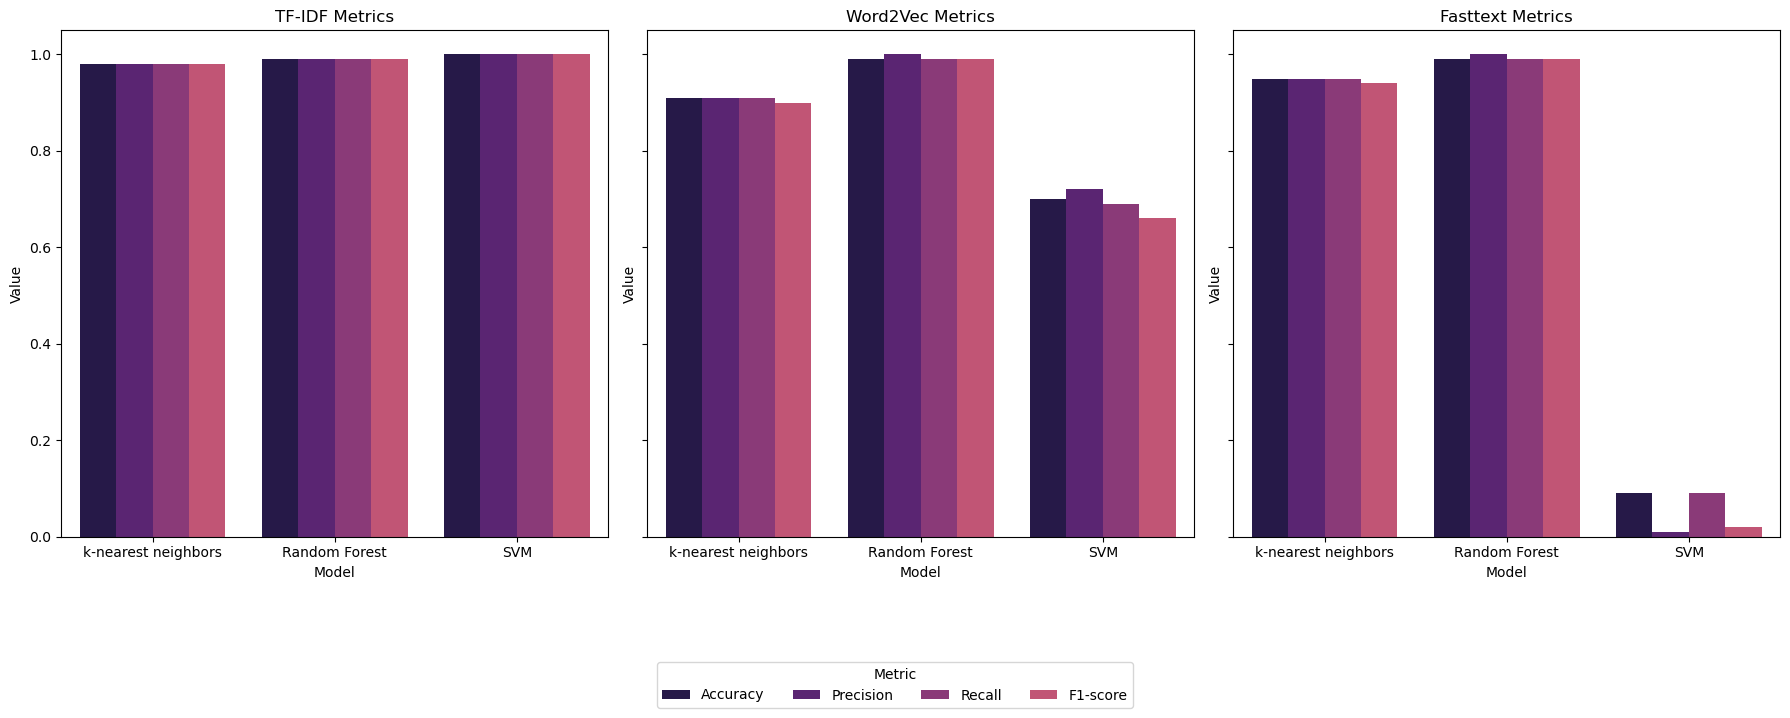

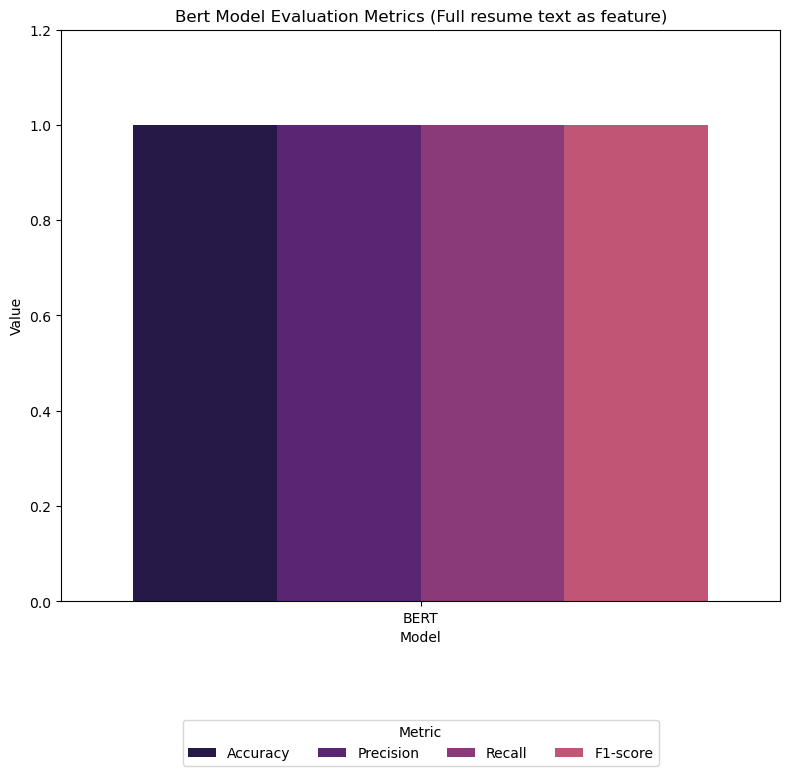

In [39]:
non_bert_data_resume = {
    'Model': ['k-nearest neighbors', 'Random Forest', 'SVM'],
    'TF-IDF_Accuracy': [0.98, 0.99, 1.00],
    'TF-IDF_Precision': [0.98, 0.99, 1.00],
    'TF-IDF_Recall': [0.98, 0.99, 1.00],
    'TF-IDF_F1-score': [0.98, 0.99, 1.00],
    'Word2Vec_Accuracy': [0.91, 0.99, 0.7],
    'Word2Vec_Precision': [0.91, 1.00, 0.72],
    'Word2Vec_Recall': [0.91, 0.99, 0.69],
    'Word2Vec_F1-score': [0.9, 0.99, 0.66],
    'Fasttext_Accuracy': [0.95, 0.99, 0.09],
    'Fasttext_Precision': [0.95, 1.00, 0.01],
    'Fasttext_Recall': [0.95, 0.99, 0.09],
    'Fasttext_F1-score': [0.94, 0.99, 0.02],
}
# BERT model data
bert_data_resume = {
    'Model': ['BERT'],
    'Accuracy': [1.00],
    'Precision': [1.00],
    'Recall': [1.00],
    'F1-score': [1.00],
}

plotgen_non_bert(non_bert_data_resume,'Other Model Evaluation Metrics (Full resume text as feature)','magma')
plotgen_bert(bert_data_resume, 'Bert Model Evaluation Metrics (Full resume text as feature)','magma')